In [2]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [4]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)
# make dataset to train

In [5]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [6]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        #print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [7]:
# hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [8]:
# load data
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [9]:
print(train_size)
print(train_set.shape)
print(test_set.shape)
print(test_set.dtype)

512
(512, 5)
(227, 5)
float64


In [10]:
# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)
print(train_set.shape)
print(test_set.shape)
print(test_set)

(512, 5)
(227, 5)
[[0.47419206 0.50445037 0.51770809 0.22296353 0.49142842]
 [0.46909658 0.46301195 0.47045433 0.2111109  0.45809697]
 [0.40525134 0.46000606 0.44658508 0.18462886 0.4877246 ]
 ...
 [0.89281215 0.89655181 0.94323484 0.12965206 0.93124657]
 [0.91133638 0.91818448 0.95944078 0.1885611  0.95460261]
 [0.94514702 0.94989685 1.         0.12331575 0.97604677]]


In [11]:
# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(505, 7, 5) (505, 1)
(220, 7, 5) (220, 1)


In [11]:
# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)
testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

In [12]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

net = Net(data_dim, hidden_dim, output_dim, 1)

In [13]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [14]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038293838501
1 0.18340936303138733
2 0.15106433629989624
3 0.12612313032150269
4 0.10598733276128769
5 0.08915016800165176
6 0.07493706792593002
7 0.06327901035547256
8 0.05449603125452995
9 0.049023859202861786
10 0.04693442955613136
11 0.04731707647442818
12 0.048382632434368134
13 0.04839476943016052
14 0.046337660402059555
15 0.04207771271467209
16 0.03620169684290886
17 0.029662007465958595
18 0.023386554792523384
19 0.018011240288615227
20 0.013800660148262978
21 0.01071465015411377
22 0.008532215841114521
23 0.006976506672799587
24 0.00582447974011302
25 0.004987421445548534
26 0.0045247129164636135
27 0.004554684739559889
28 0.0050899009220302105
29 0.005920969881117344
30 0.006684894673526287
31 0.007072674576193094
32 0.006973989307880402
33 0.006471901200711727
34 0.005753519479185343
35 0.005014690570533276
36 0.004395289346575737
37 0.003953743726015091
38 0.003676637774333358
39 0.0035109836608171463
40 0.003401306690648198
41 0.003315107664093375
42 0.00324889435

328 0.0014436452183872461
329 0.0014420467196032405
330 0.00144045555498451
331 0.0014388707932084799
332 0.0014372927835211158
333 0.001435721293091774
334 0.0014341557398438454
335 0.0014325982192531228
336 0.0014310460537672043
337 0.001429500407539308
338 0.0014279610477387905
339 0.0014264282071962953
340 0.0014249017694965005
341 0.0014233819674700499
342 0.001421867636963725
343 0.0014203599421307445
344 0.0014188577188178897
345 0.0014173620147630572
346 0.001415872247889638
347 0.0014143888838589191
348 0.0014129109913483262
349 0.0014114391524344683
350 0.0014099738327786326
351 0.0014085139846429229
352 0.0014070604229345918
353 0.001405611983500421
354 0.0014041704125702381
355 0.0014027341967448592
356 0.0014013039181008935
357 0.00139988015871495
358 0.0013984611723572016
359 0.001397048938088119
360 0.001395642408169806
361 0.001394241931848228
362 0.0013928473927080631
363 0.0013914587907493114
364 0.001390076125971973
365 0.0013886999804526567
366 0.001387329655699432


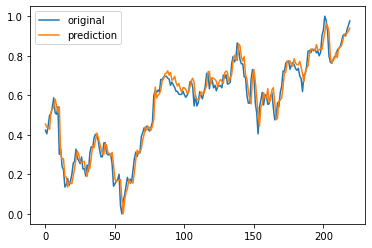

In [15]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()